# Project: An investigation into a TMDB dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I am investigating a TMDb movies database file which has collection of important detials of about 10,000 movies, including their details of budget, revenue, release dates, etc.

#### Questions that can be answer using this dataset
<ol>
Looking at this database...
<li>The first question that pops in my mind is which movies gained the most profit or  which movie has been the people's favourite(popularity)?</li>
<li>Other similar questions can also be raised such as what was the average runtime of successful movies or in general?</li>
<li>Also how much profit does a movie make on an average?</li>
<li>Another question that comes to mind is which year was the most profitable for the movie industry?</li>
<li>And last but not the least what are the similar characteristics of movies which earned good profits?</li>
</ol>

In [1]:
#importing all the nescessory libraries we need for our analysis
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

#this variable will store the database of tmdb movies into a dataframe
movie_data = pd.read_csv('tmdb-movies.csv')

#calling out first 5 rows 
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### What needs to be Wrangled & Cleaned?
We want to know do we have all the valid values of the variables that we want to calculate and how can this data be trimmed so we can only have the columns we need. This will also make our dataset clean and easy for us to calculate what we want.
<ul>
<li>In this database of movies there are lots of movies where the budget or revenue have a value of '0' which means that the values of those variables of those movies has not been recorded. Calculating the profits of these movies would lead to inappropriate results. So we need to delete these rows.</li>
<li>Also this dataset has some duplicate rows. So we need to delete these rows too.</li>
<li>The 'release_date' column must be converted into date format.</li>
<li>Finally, we will also remove unnecessory columns such as  'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count' and 'vote_average'.</li>
</ul>



### Questions to be Answered
<ol>
    <li><h3>General questions about the dataset.</h3> </li>
        <ol>
            <li>Which movie had the greatest and least budget?</li>
            <li>Which movie had the greatest and least revenue?</li>
            <li>Which movie was the most and least profitable?</li>
            <li>Which movie was the most and the least popular?</li>
            <li>Which movie was the highest and the lowest rated?</li>
            <li>What is the average runtime of all the movies?</li>
            <li>How much is the average profit earned by all the movies?</li>
            <li>In which year we had the most profit making movies?</li>
        </ol>
    <li><h3>What stats or properties are associated with films that made good profit?</h3></li>
        <ol>
            <li>Average runtime of these movies.</li>
            <li>Average Budget of these movies.</li>
            <li>Average revenue of these movies.</li>
            <li>Average profits of these movies.</li>
            <li>Most successful director?</li>
            <li>Most successful Actors(male and female)?</li>
            <li>Most successful genre?</li>
            <li>And which month was most profitable?</li>
        </ol>
</ol>


<a id='wrangling'></a>
## Data Wrangling

First, lets clean up the columns.
We will only keep the columns we need and remove the rest of them.

Columns to delete -  'id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.'

Also lets see how many entries we have in this dataset.

In [2]:
rows, col = movie_data.shape
#since 'rows' includes count of a header
print('We have {} total entries of movies and {} features of it.'.format(rows-1, col))

We have 10865 total entries of movies and 21 features of it.


In [3]:
col_del = [ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count']

 
#deleting the columns from the database
movie_data = movie_data.drop(col_del, axis=1)
#now take a look at this new dataset
movie_data.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,7.3,2015


Now lets check for any duplicate rows and clean up.

In [4]:
#will drop duplicate rows but will keep the first one
movie_data.drop_duplicates(inplace = True)

rows, col = movie_data.shape
print('We now have {} total entries of movies and {} features of it.'.format(rows-1, col))

We now have 10864 total entries of movies and 12 features of it.


So we had one duplicate copy of a movie. Now we have 10864 movie entries.

Now, lets figure out which movies have a value of '0' in their 'budget' or 'revenue', and then deleting those movies from database.

In [5]:
#list of column names that needs to be checked
check_row = ['budget', 'revenue']

#replace the value of '0' to NaN of columns given in the list
movie_data[check_row] = movie_data[check_row].replace(0, np.NaN)

#drop any row which has NaN values in any of the column (check_row) 
movie_data.dropna(subset = check_row, inplace = True)

rows, col = movie_data.shape
print('After cleaning, we now have only {} entries of movies.'.format(rows-1))

After cleaning, we now have only 3853 entries of movies.


In the previous dataset there were 10000+ rows and 21 columns we have now come down to 3853 rows and 10 columns. These many columns are needed for analysis and we have all the rows that have valid values for our calculations.

Now we need to convert the 'release_date' column to date format
And the 'budget' and 'revenue' column to int data type

In [6]:
#converting the 'release_date' column to date format
movie_data.release_date = pd.to_datetime(movie_data['release_date'])

#applymap function changes the columns data type to the type 'argument' we pass
change_coltype = ['budget', 'revenue']

movie_data[change_coltype] = movie_data[change_coltype].applymap(np.int64)
#shwoing the datatypes of all columns
movie_data.dtypes

#showing the dataset
movie_data.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

Let's answer each question one by one.


But before that lets add another column to the dataset displaying the profit of each movie.

In [7]:
#To calculate profit of each movie, we need to substract the budget from the revenue of each movie
movie_data.insert(3, 'profit', movie_data['revenue'] - movie_data['budget'])

#showing the dataset
movie_data.head()


,popularity,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015
2,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015
4,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,7.3,2015


## Starting with the questions ##

### General questions about the dataset.###

In [8]:
#defining a function to return min and max values from any given column
def max_min(col_name):
    
    #highest
    highest_ind = movie_data[col_name].idxmax()
    highest_details = pd.DataFrame(movie_data.loc[highest_ind])
    
    #lowest
    lowest_ind = movie_data[col_name].idxmin()
    lowest_details = pd.DataFrame(movie_data.loc[lowest_ind])
    
    #concatenating two dataframes
    min_max_data = pd.concat([highest_details, lowest_details], axis = 1)
    
    return min_max_data



#### Which movie had the greatest and least budget?####

In [9]:
#calling the function on the budget column
max_min('budget')

,2244,2618
popularity,0.25054,0.090186
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance


We can see that the movie `The Warriors Way` had the biggest budget, of about `$425M`. This same movie seems to be the movie which had the least profit. So it makes sense that having a big budget, makes it harder for the film to earn good profits.

The movie with the least budget is  the `Lost & Found` movie with a budget of `$1`.A movie with `95 min` of runtime managed with such low budget! But we can clearly see that the revenue earned by this movie is also very low `$100`, earning a profit `$99`, this must be a local movie release. Because it's kind of impossible to have such low budget and earn low revenues if it had been released internationally.

#### Which movie had the greatest and least revenue? ####

In [10]:
#calling the function on the revenue column
max_min('revenue')

,1386,5067
popularity,9.43277,0.462609
budget,237000000,6000000
revenue,2781505847,2
profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History


`Avatar` movie has made biggest revenue. Making a revenue of more than $2.7B, it makes a logical sense that the more revenue you earn the more profit you gain. 

Having lowest revenue of $2,the movie 'Shattered Glass' seems like couldn't sell much tickets

#### Which movie was the most and least profitable?####

In [11]:
#calling the function on the profit column
max_min('profit')

,1386,2244
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


As we can clearly see that `Avatar` the movie has the highest profit in all, making over `$2.5B`.Interestingly this same movie had the highest revenue too!!!

And the movie suffering the greatest loss is `The Warriors Way`. Having a loss of more than `$400M`.This same movie also had the highest budget. So it makes sense that having a big budget makes it harder for the film to have big revenues and earn more profits.

It really looks like there's a correlation between profit and budget/revenue but we can't say that just yet.

#### Which movie was the most and the least popular? ####

In [12]:
#calling the function on the popularity column
max_min('popularity')

,0,7268
popularity,32.9858,0.001117
budget,150000000,350000
revenue,1513528810,3515061
profit,1363528810,3165061
original_title,Jurassic World,Born into Brothels
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Zana Briski|Avijit|Geeta Masi|Kochi|Mamuni
director,Colin Trevorrow,Zana Briski|Ross Kauffman
tagline,The park is open.,NaN
runtime,124,85
genres,Action|Adventure|Science Fiction|Thriller,Documentary


The result is pretty extreme with the most popular movie being the `Jurassic  World`
with a popularity of over `32`.
And the least popular movie is `Born in Brothels` with a popularity almost close to`0`.

#### Which movie was the hightest and the lowest rated? ####

In [13]:
#calling the function on the vote_average column
max_min('vote_average')

,4178,4859
popularity,7.19204,0.111351
budget,25000000,65000000
revenue,28341469,73706
profit,3341469,-64926294
original_title,The Shawshank Redemption,Foodfight!
cast,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...
director,Frank Darabont,Lawrence Kasanoff
tagline,Fear can hold you prisoner. Hope can set you f...,When good food... goes bad!
runtime,142,87
genres,Drama|Crime,Animation|Action|Comedy|Family


The highest rated movie is the `The Shawshank Redemption`
with a rating of over `7`.
And the lowest rated  movie is `Foodfight!` with a rating of`0.11`.

In [14]:
#defining a function to return the mean of a given column of the movie_data dataset
def average_(col_name):
    return movie_data[col_name].mean()


#### What is the average runtime of all the movies?####

In [15]:
#calling the average function on the runtime column
print("The average runtime of all the movies is {} minutes.".format(average_('runtime')))

The average runtime of all the movies is 109.22029060716139 minutes.


#### How much is the average profit earned by all the movies?####

In [16]:
#calling the average function on the profit column
print("The average profit earned by all the movies is {} USD.".format(average_('profit')))

The average profit earned by all the movies is 70482919.14322782 USD.


#### In which year we had the most profit making movies?

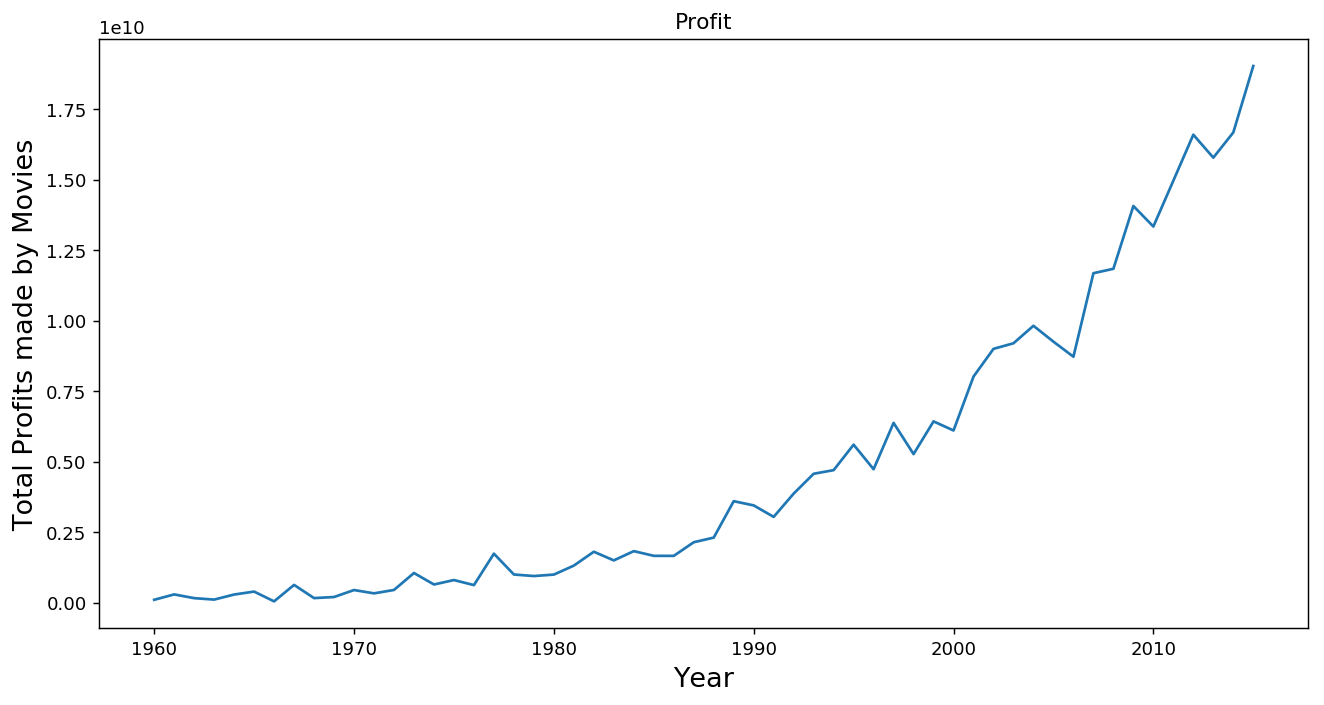

In [17]:
#Line plot used for this
#Since we want to know the profits of movies for every year we need to group all the movies for those years

#the groupby function below collects all the movies for that year and then the profits of all those movies for that years is been added
#and storing all this in variable
profits_year = movie_data.groupby('release_year')['profit'].sum()

#giving the figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#labeling x-axis
plt.xlabel('Year', fontsize = 15)
#labeling y-axis
plt.ylabel('Total Profits made by Movies', fontsize = 15)
#title of a the plot
plt.title('Profit')

#plotting what needs to be plotted
plt.plot(profits_year)

#showing the plot
plt.show()

In [18]:
#storing the values in the the form of DataFrame just to get a clean and better visual output
profits_year = pd.DataFrame(profits_year)
#printing out
profits_year.tail()

,profit
release_year,
2011,14966694704
2012,16596845507
2013,15782743325
2014,16676201357
2015,19032145273


Each values in the y-axis is multiplied to '1e10' (as shown above in the plot). Since the profits of movies are high(9+ digits), cannot fit the axis. So for example at the year 2010, the y-aixs value is around 1.35, which means that the profit made by all the movies released in that year is 1.35x1e10 =  13500000000 which is 13.5 billion dollars.

The year `2015`, shows us the highest peak, having the highest profit than in any year, of more than `18 billion dollars`.We can clearly see that in terms of decades this graph does show significant uprise in profits. At the year 2000, profits were around 8 billion dollars, but in just 15 years it increased by 10+ billion dollars. Last 15 years had a significant rise in profits compared to any other decades as we can see in the graph.

Not every year had same amount of movies released, the year 2015 had the most movie releases than in any other year. 

Another point to be noted, is that this dataset includes the movies that negative profits which drags down the the profits of other movies in those years. So we are not just calculating the movies which made profits, but also which went in loss! The highest profit making movie Avatar in 2009 alone drags the profit up by 2.5 billion dollars out of 14 billion dollars(calculations below).

### What stats or properties are associated with films that made good profit? ###

We first need to clean the data in order to get the data of only the movies that made profit..
Let's take only the movies which made a profit of atleast 50M dollars or more i.e. 50000000.

In [19]:
#separating the data of movies having a profit of atleast $50M or more
better_movies = movie_data[movie_data['profit'] >= 50000000]

#reindexing new dataframe
better_movies.index = range(len(better_movies))

#initialize dataframe from 1 instead of 0
better_movies.index = better_movies.index + 1

#length of data remaining
print("Total entries remaining in the data are {}.".format(len(better_movies)))

Total entries remaining in the data are 1338.


In [20]:
#showing the dataset
better_movies.head()

,popularity,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year
1,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
2,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015
3,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015
4,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015
5,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,7.3,2015


In [21]:
#defining a function to return the mean of a given column of the better_movies dataset
def better_average(col_name):
    return better_movies[col_name].mean()

#### Average runtime of these movies. ####

In [22]:
#calling the better_average function on the runtime column of the new dataset
print("The average runtime of all these movies is {} minutes.".format(better_average('runtime')))

The average runtime of all these movies is 113.66741405082212 minutes.


#### Average Budget of these movies. ####

In [23]:
#calling the better_average function on the budget column of the new dataset
print("The average budget of all these movies is {} USD.".format(better_average('budget')))

The average budget of all these movies is 60444957.76083707 USD.


The average budget of movies with atleast $50M profit is around `$60M dollars`.

#### Average Revenue of these movies. ####

In [24]:
#calling the better_average function on the revenue column of the new dataset
print("The average revenue of all these movies is {} USD.".format(better_average('revenue')))

The average revenue of all these movies is 254957662.59491777 USD.


#### Average Profit of these movies. ####

In [25]:
#calling the better_average function on the profir column of the new dataset
print("The average profit of all these movies is {} USD.".format(better_average('profit')))

The average profit of all these movies is 194512704.83408073 USD.


In [26]:
#function to count the occurence of a value in a given column
def value_count(col_name):
    #will take a column, and separate the string by '|'
    values = better_movies[col_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    values = pd.Series(values.split('|'))
    
    #this will us value in descending order
    count = values.value_counts(ascending = False)
    
    return count

#### Most successful Directors.####

In [27]:
#calling the value_count function on the director column of the new dataset
director_count = value_count('director')
#top 5
director_count.head()

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Ridley Scott        10
dtype: int64

'Steven Spielberg' takes the crown! Directing 23 movies with a profit of over $50M+ in is no joke! Also the other directors following along the list such as 'Robert Zemeckis', 'Clint Eastwood', 'Tim Burton' etc prove to be really great directors.

#### Most successful Actors(male and female)? ####

In [28]:
#calling the value_count function on the cast column of the new dataset
cast_count = value_count('cast')
#top 5
cast_count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

'Tom Cruise' wins for appearing the most in movies profiting more than $50M. Directors hiring these actors will have higher probability of making huge profits also this doesn't mean that movies with actors other than these will make less profit. Famous actors such as 'Tom Cruise', 'Brad Pitt', 'Tom Hanks', etc have huge fanbase, which obviously affects the revenue of the movies but its not always necessary, there are other influential factors aswell.

#### Most successful genre? ####

In [29]:
#calling the value_count function on the genres column of the new dataset
genre_count = value_count('genres')
#top 5
genre_count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

Let's visualize the findings.

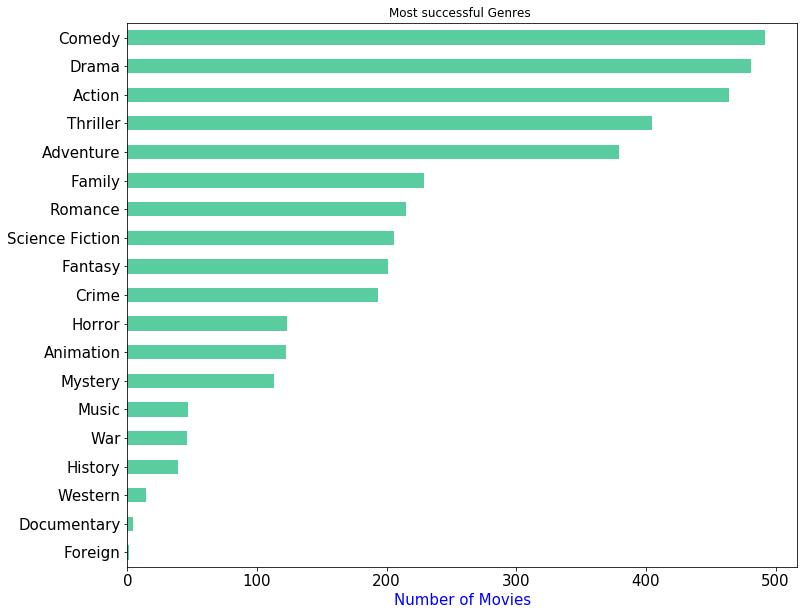

In [30]:
#since our count is in descending order and graph plot points from bottom to top
genre_count.sort_values(ascending = True, inplace = True)

#initializing plot
genre_hist= genre_count.plot.barh(color = '#59cca0', fontsize = 15)

#giving a title
genre_hist.set(title = 'Most successful Genres ')

#x-label
genre_hist.set_xlabel('Number of Movies', color = 'b', fontsize = '15')

#giving the figure size(width, height)
genre_hist.figure.set_size_inches(12, 10)

#showing the plot
plt.show()

`Comedy` genre takes the lead here with `492` movies from the $50M profit club being from this genre.
`Drama` and `Action` aren't too far behind with `481` and `464` movies from each genre respectively.

#### Which month was most profitable?####

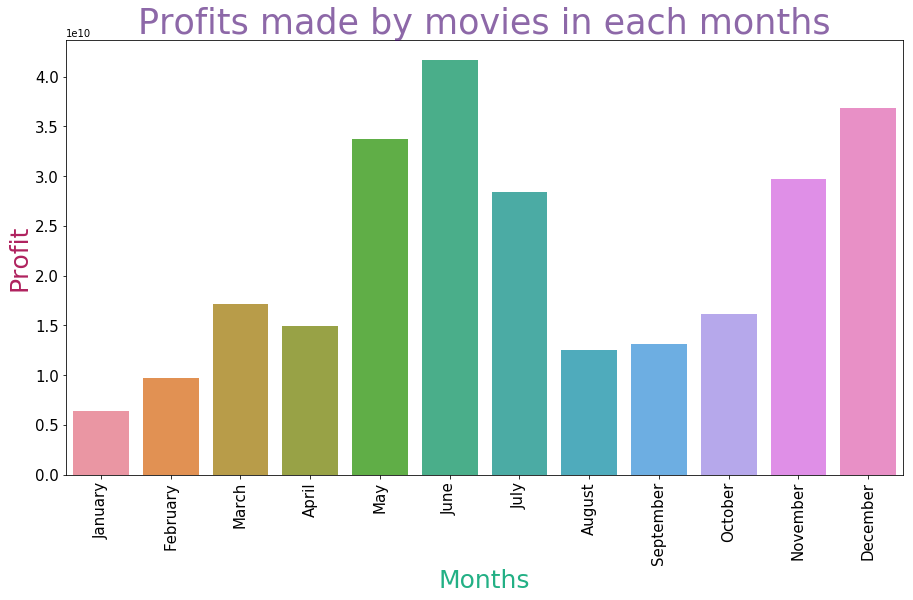

In [31]:
#group all of the months of years and then calculate the profits of those months


#giving a new dataframe which gives 'release-date' as index
release_date_movies = better_movies.set_index('release_date')

#group all the data by month
groupby_month = release_date_movies.groupby([(release_date_movies.index.month)])

#add 'profit' values to respective months, saving all this to a new var
monthly_profit = groupby_month['profit'].sum()

#convert table to a dataframe
monthly_profit = pd.DataFrame(monthly_profit)

#giving a list of months
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#giving seaborn bar plot to visualize the data
#giving values to our graph
mp_bar = sns.barplot(x = monthly_profit.index, y = monthly_profit['profit'], data = monthly_profit)

#setting size of the graph
mp_bar.figure.set_size_inches(15,8)

#setting the title and customizing
mp_bar.axes.set_title('Profits made by movies in each months', color="#42056F", fontsize = 35, alpha = 0.6)

#setting x-label
mp_bar.set_xlabel("Months", color="#23B085", fontsize = 25)
#setting y-label
mp_bar.set_ylabel("Profit", color="#B0235F", fontsize = 25)

#customizing axes values
mp_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
mp_bar.set_xticklabels(month_list, rotation = 90, size = 15)

#shows the plot
plt.show()

It is the month of June that seems to be the most profitable month for the movie industry.

<a id='conclusions'></a>
## Conclusions##

#### General questions about the dataset.<br>
**Which movie had the greatest and least budget?**<br>
    greatest-> The Warrior's Way<br>
    least->	Lost & Found<br>
**Which movie had the greatest and least revenue?**<br>
    greatest-> Avatar	<br>
    least-> Shattered Glass<br>
**Which movie was the most and least profitable?**<br>
    greatest-> Avatar	<br>
    least-> The Warrior's Way<br>
**Which movie was the most and the least popular?**<br>
    greatest-> Jurassic World	<br>
    least-> Born into Brothels<br>
**Which movie was the highest and the lowest rated?**<br>
    highest-> The Shawshank Redemption	<br>
    lowest-> Foodfight!<br>
**What is the average runtime of all the movies?**<br>
    average runtime-> 109.22029060716139 minutes<br>
**How much is the average profit earned by all the movies?**<br>
    average profit earned-> 70482919.14322782 USD.<br>

#### What stats or properties are associated with films that made good profit?<br>
**Average runtime of these movies.**<br>
    -> 113.66741405082212 minutes<br>
**Average Budget of these movies.**<br>
    -> 60444957.76083707 USD<br>
**Average revenue of these movies.**<br>
    -> 254957662.59491777 USD<br>
**Average profits of these movies.**<br>
    -> 194512704.83408073 USD<br>
**Most successful directors(top 5)?**<br>
    -> Steven Spielberg   <br> 
    -> Robert Zemeckis    <br>
    -> Clint Eastwood      <br>
    -> Tim Burton          <br>
    -> Ron Howard         <br>
**Most successful Actors(male and female)(top 5)?**<br>
    -> Tom Cruise          <br>
    -> Brad Pitt               <br>
    -> Tom Hanks            <br>
    -> Sylvester Stallone  <br>
    -> Cameron Diaz          <br>
**Most successful genre(top 5)?**<br>
    -> Comedy    <br>
    -> Drama       <br>
    -> Action       <br>
    -> Thriller     <br>
    -> Adventure  <br>
**And which month was most profitable?**<br>
    -> June   


### Limitations
When working with a dataset the results are never 100% reliable for a causation conclusion i.e we can not imply from our statistical results that our conclusions will hold strong in each and every case.
For example:
Saying that a movie with one of the successful directors and a successful cast from our conclusion will always earn freat profits.

Some other limitations of our investigation are:
<ul>
    <li> We trimmed the data down from 10865 entries to 3853 and then to 1338 for our final tests.</li>
    <li> The data provide had all sorts of values (+ve,-ve,0s,NaNs...)</li>
    <li> Last but not the least this data never contained every movie ever released or for instance all the movies till date</li>
</ul>